In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
main_df = pd.read_csv('../data/Daegu_Real_Estate_data.csv')
main_df.head()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0


In [4]:
df = main_df.copy()

In [5]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
cat_cols

['HallwayType',
 'HeatingType',
 'AptManageType',
 'TimeToBusStop',
 'TimeToSubway',
 'SubwayStation']

In [6]:
num_cols = [col for col in df.columns if df[col].dtypes != "O"]
num_cols

['SalePrice',
 'YearBuilt',
 'YrSold',
 'MonthSold',
 'Size(sqf)',
 'Floor',
 'N_Parkinglot(Ground)',
 'N_Parkinglot(Basement)',
 'N_APT',
 'N_manager',
 'N_elevators',
 'N_FacilitiesNearBy(PublicOffice)',
 'N_FacilitiesNearBy(Hospital)',
 'N_FacilitiesNearBy(Dpartmentstore)',
 'N_FacilitiesNearBy(Mall)',
 'N_FacilitiesNearBy(ETC)',
 'N_FacilitiesNearBy(Park)',
 'N_SchoolNearBy(Elementary)',
 'N_SchoolNearBy(Middle)',
 'N_SchoolNearBy(High)',
 'N_SchoolNearBy(University)',
 'N_FacilitiesInApt',
 'N_FacilitiesNearBy(Total)',
 'N_SchoolNearBy(Total)']

<AxesSubplot:>

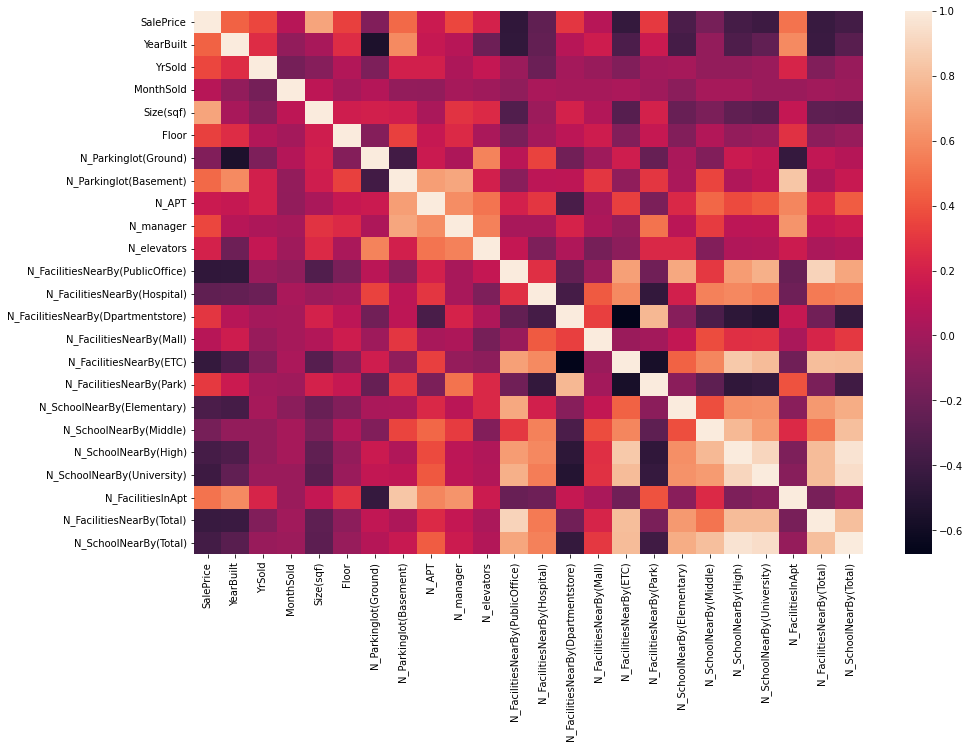

In [7]:
corr = df[num_cols].corr()

fig, ax1 = plt.subplots(figsize=(15,10))
sns.heatmap(corr, ax=ax1)

In [10]:
df_corr = df.corr()['SalePrice'].abs().sort_values(ascending=False)
df_corr

SalePrice                             1.000000
Size(sqf)                             0.697199
N_FacilitiesInApt                     0.505282
N_Parkinglot(Basement)                0.473252
N_FacilitiesNearBy(PublicOffice)      0.462234
YearBuilt                             0.447875
N_FacilitiesNearBy(ETC)               0.442299
N_FacilitiesNearBy(Total)             0.419763
N_SchoolNearBy(University)            0.403080
N_SchoolNearBy(Total)                 0.377904
N_SchoolNearBy(High)                  0.371840
N_manager                             0.358329
YrSold                                0.357682
N_SchoolNearBy(Elementary)            0.341186
Floor                                 0.336729
N_FacilitiesNearBy(Park)              0.310906
N_FacilitiesNearBy(Dpartmentstore)    0.295732
N_FacilitiesNearBy(Hospital)          0.257282
N_elevators                           0.208248
N_SchoolNearBy(Middle)                0.166439
N_APT                                 0.162684
N_Parkinglot(

Keeping 0.45 as coorelation threshold

In [11]:
num_cols = ['SalePrice','Size(sqf)','N_FacilitiesInApt','N_Parkinglot(Basement)']

In [22]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
df_ohe = ohe.fit_transform(df[cat_cols])

In [38]:
df_ohe = pd.DataFrame(df_ohe.toarray(), columns = ohe.get_feature_names_out())

In [28]:
ohe.get_feature_names_out()

array(['HallwayType_corridor', 'HallwayType_mixed',
       'HallwayType_terraced', 'HeatingType_central_heating',
       'HeatingType_individual_heating',
       'AptManageType_management_in_trust',
       'AptManageType_self_management', 'TimeToBusStop_0~5min',
       'TimeToBusStop_10min~15min', 'TimeToBusStop_5min~10min',
       'TimeToSubway_0-5min', 'TimeToSubway_10min~15min',
       'TimeToSubway_15min~20min', 'TimeToSubway_5min~10min',
       'TimeToSubway_no_bus_stop_nearby', 'SubwayStation_Bangoge',
       'SubwayStation_Banwoldang', 'SubwayStation_Chil-sung-market',
       'SubwayStation_Daegu', 'SubwayStation_Kyungbuk_uni_hospital',
       'SubwayStation_Myung-duk', 'SubwayStation_Sin-nam',
       'SubwayStation_no_subway_nearby'], dtype=object)

In [32]:
!pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 3.8 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 2.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [51]:
def vif_calc(df):
    
    vif_df = pd.DataFrame()
    vif_df['features'] = ohe.get_feature_names_out()
    vif_df['VIF'] = [variance_inflation_factor(df.values,i) for i in range(len(ohe.get_feature_names_out()))]
    
    return vif_df

In [42]:
for i in range(len(cat_cols)):
    vif_df = variance_inflation_factor(df_ohe.values,i)
    print(vif_df)

73028.8483179742
715.3530523121877
792.9318796698818
34094.83311991289
13.753275552742268
74.1185433018781


In [57]:
df_new = pd.concat([df_ohe,df['SalePrice']],axis=1)
vif_calc(df_new)

C:\Users\shoab\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,HallwayType_corridor,inf
1,HallwayType_mixed,inf
2,HallwayType_terraced,inf
3,HeatingType_central_heating,inf
4,HeatingType_individual_heating,inf
5,AptManageType_management_in_trust,inf
6,AptManageType_self_management,inf
7,TimeToBusStop_0~5min,inf
8,TimeToBusStop_10min~15min,inf
9,TimeToBusStop_5min~10min,inf


In [53]:
df[cat_cols]

,HallwayType,HeatingType,AptManageType,TimeToBusStop,TimeToSubway,SubwayStation
0,terraced,individual_heating,management_in_trust,5min~10min,10min~15min,Kyungbuk_uni_hospital
1,corridor,individual_heating,self_management,0~5min,5min~10min,Daegu
2,corridor,individual_heating,self_management,0~5min,5min~10min,Daegu
3,terraced,individual_heating,management_in_trust,0~5min,0-5min,Sin-nam
4,mixed,individual_heating,management_in_trust,0~5min,15min~20min,Myung-duk
...,...,...,...,...,...,...
5886,terraced,individual_heating,management_in_trust,0~5min,0-5min,Kyungbuk_uni_hospital
5887,terraced,individual_heating,management_in_trust,5min~10min,0-5min,Myung-duk
5888,terraced,individual_heating,management_in_trust,0~5min,0-5min,Kyungbuk_uni_hospital
5889,corridor,individual_heating,self_management,0~5min,0-5min,Kyungbuk_uni_hospital
